Dataset file not found. Creating sample data for demonstration...
Sample dataset created with 1000 movies

DATASET OVERVIEW
Dataset Shape: (1000, 7)

Columns: ['name', 'year', 'genre', 'director', 'duration', 'votes', 'rating']

First 5 rows:
      name  year     genre          director  duration  votes  rating
0  Movie_0  2018  Thriller   Martin Scorsese       129  23931     7.3
1  Movie_1  2004    Horror  Denis Villeneuve       108  90116     6.8
2  Movie_2  1997    Comedy  Denis Villeneuve       165  56633     7.5
3  Movie_3  2010    Action             Other       161  81702     4.3
4  Movie_4  2008    Comedy  Steven Spielberg       161  52913     4.7

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1000 non-null   object 
 1   year      1000 non-null   int64  
 2   genre     1000 non-null   object 
 3   director  1000 no

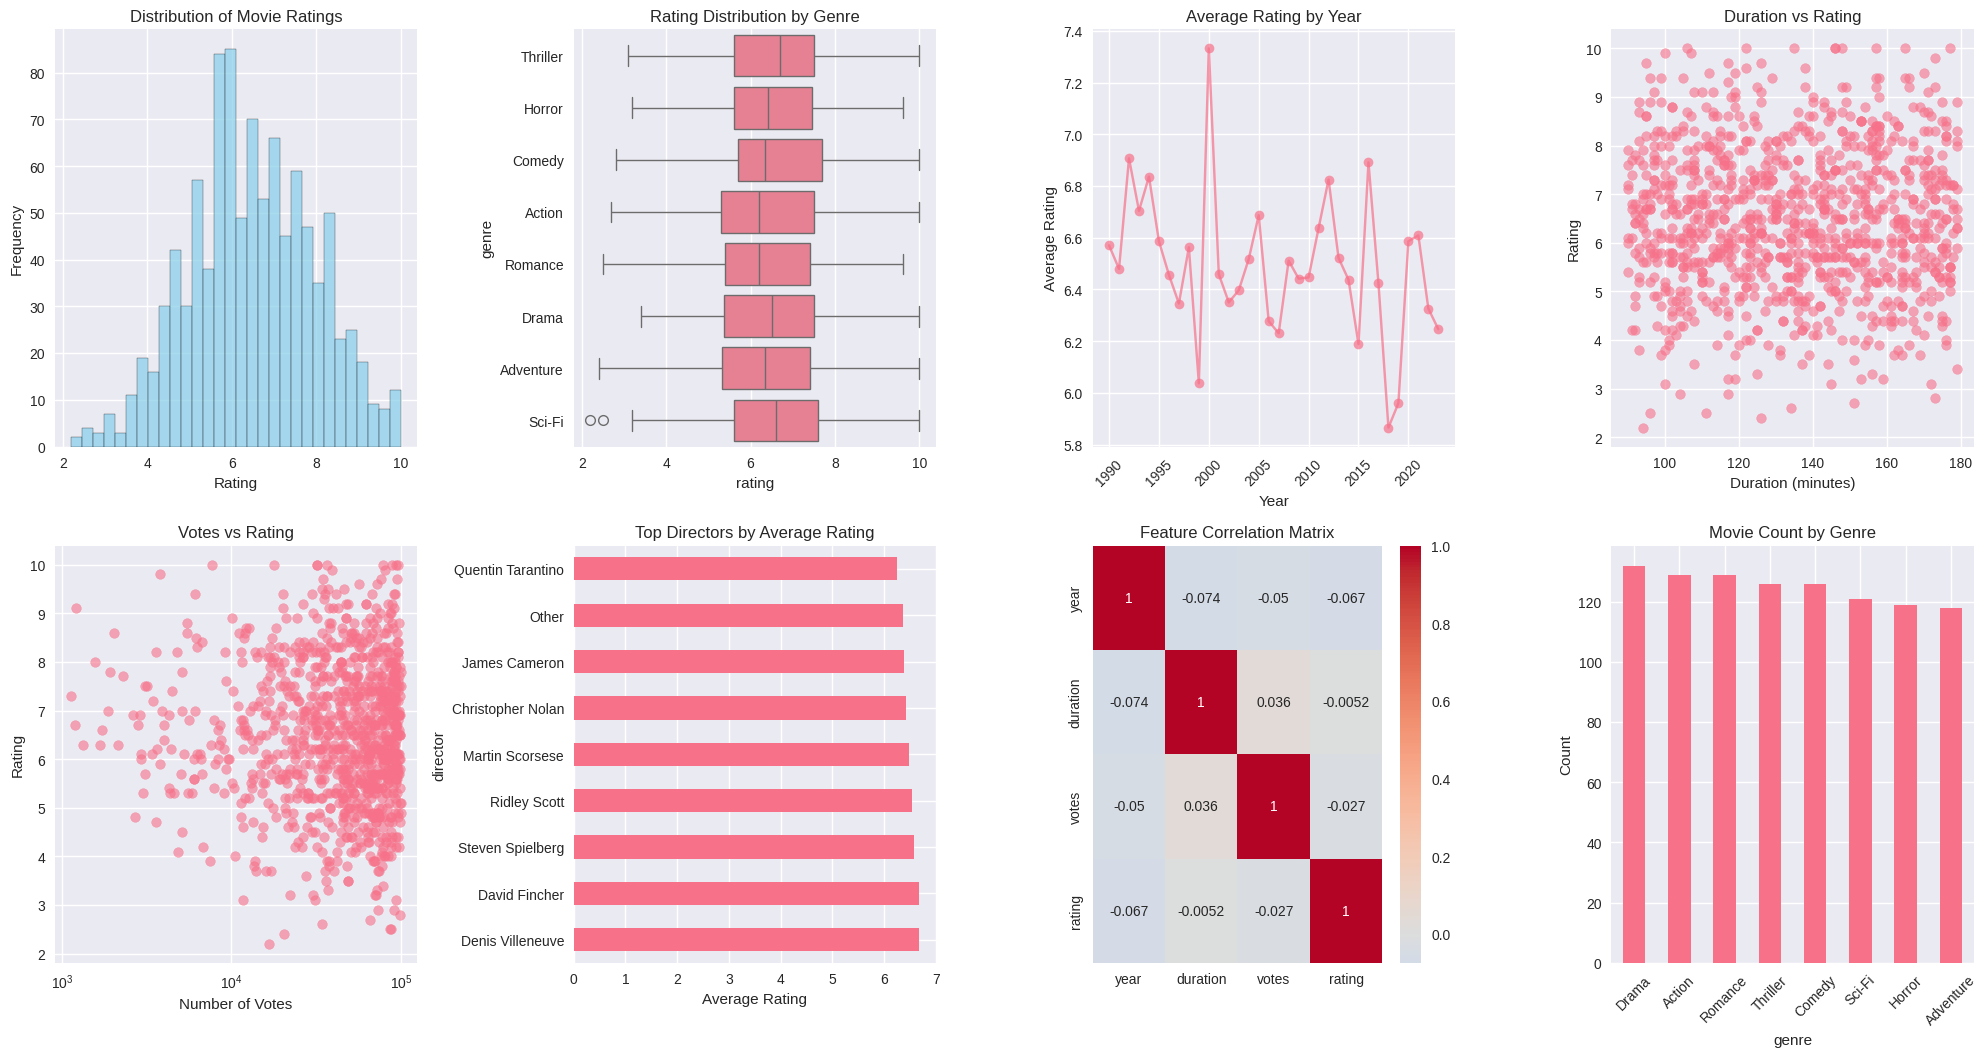


DATA PREPROCESSING
Data preprocessing completed!
New shape: (1000, 18)
New columns: ['movie_age', 'is_recent', 'decade', 'is_long_movie', 'duration_category', 'log_votes', 'is_popular', 'director_avg_rating', 'director_movie_count', 'is_famous_director', 'genre_avg_rating']

Features selected for modeling: 18
Features: ['year', 'duration', 'votes', 'movie_age', 'is_recent', 'is_long_movie', 'log_votes', 'is_popular', 'director_avg_rating', 'director_movie_count', 'is_famous_director', 'genre_avg_rating', 'genre_encoded', 'duration_category_encoded', 'decade_1990', 'decade_2000', 'decade_2010', 'decade_2020']

Final dataset shape for modeling: (1000, 24)

Training set shape: (800, 18)
Test set shape: (200, 18)

MODEL TRAINING & EVALUATION

Training Linear Regression...
Results for Linear Regression:
  RMSE: 1.5055
  MAE: 1.2262
  R² Score: -0.0140

Training Ridge Regression...
Results for Ridge Regression:
  RMSE: 1.5040
  MAE: 1.2242
  R² Score: -0.0119

Training Lasso Regression...
R

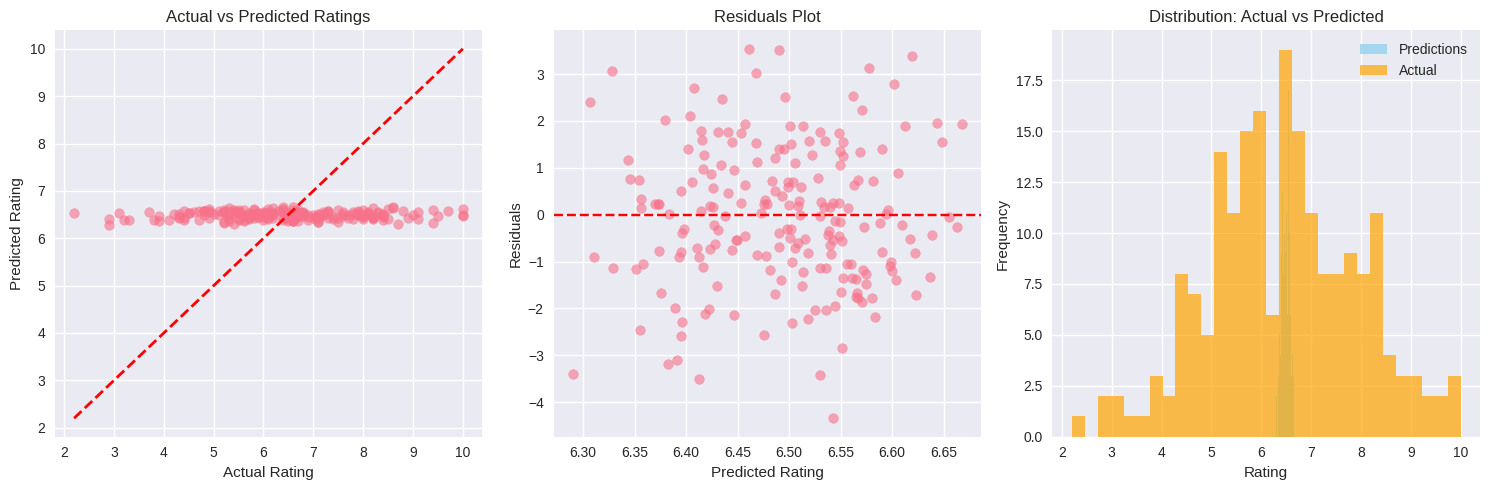


EXAMPLE PREDICTIONS

Example 1:
  Movie: 2023 Action film, 150 min, by Christopher Nolan
  Votes: 100,000
  Predicted Rating: Error in prediction - check input parameters

Example 2:
  Movie: 2020 Horror film, 90 min, by Other
  Votes: 5,000
  Predicted Rating: Error in prediction - check input parameters

Example 3:
  Movie: 2022 Drama film, 180 min, by Martin Scorsese
  Votes: 200,000
  Predicted Rating: Error in prediction - check input parameters

Example 4:
  Movie: 1995 Drama film, 120 min, by Other
  Votes: 150,000
  Predicted Rating: Error in prediction - check input parameters

MODEL SUMMARY
Best Model: Lasso Regression
RMSE: 1.4926
MAE: 1.1990
R² Score: 0.0034

This means on average, our predictions are off by 1.20 rating points.
The model explains 0.3% of the variance in movie ratings.

You can now use the predict_movie_rating() function to predict ratings for new movies!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
try:
    # Try to load from kagglehub path (adjust path as needed)
    df = pd.read_csv('path/to/your/imdb_movies.csv')
    print("Dataset loaded successfully!")
except:
    # Create a sample dataset for demonstration if file not found
    print("Dataset file not found. Creating sample data for demonstration...")

    # Sample movie data
    np.random.seed(42)
    n_movies = 1000

    genres = ['Action', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Horror', 'Sci-Fi', 'Adventure']
    directors = ['Christopher Nolan', 'Steven Spielberg', 'Martin Scorsese', 'Quentin Tarantino',
                'Denis Villeneuve', 'Ridley Scott', 'James Cameron', 'David Fincher', 'Other']

    df = pd.DataFrame({
        'name': [f'Movie_{i}' for i in range(n_movies)],
        'year': np.random.randint(1990, 2024, n_movies),
        'genre': np.random.choice(genres, n_movies),
        'director': np.random.choice(directors, n_movies),
        'duration': np.random.randint(90, 180, n_movies),
        'votes': np.random.randint(1000, 100000, n_movies),
        'rating': np.round(np.random.normal(6.5, 1.5, n_movies), 1)
    })

    # Ensure ratings are within realistic range
    df['rating'] = np.clip(df['rating'], 1.0, 10.0)

    print("Sample dataset created with", len(df), "movies")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nDataset Info:")
print(df.info())

print(f"\nMissing Values:")
print(df.isnull().sum())

print(f"\nBasic Statistics:")
print(df.describe())

# Data Visualization
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

plt.figure(figsize=(20, 15))

# Rating distribution
plt.subplot(3, 4, 1)
plt.hist(df['rating'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Rating by genre
plt.subplot(3, 4, 2)
if 'genre' in df.columns:
    sns.boxplot(data=df, y='genre', x='rating')
    plt.title('Rating Distribution by Genre')
else:
    plt.text(0.5, 0.5, 'Genre data not available', ha='center', va='center', transform=plt.gca().transAxes)

# Rating by year
plt.subplot(3, 4, 3)
if 'year' in df.columns:
    yearly_ratings = df.groupby('year')['rating'].mean()
    plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o', alpha=0.7)
    plt.title('Average Rating by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)

# Duration vs Rating
plt.subplot(3, 4, 4)
if 'duration' in df.columns:
    plt.scatter(df['duration'], df['rating'], alpha=0.6)
    plt.title('Duration vs Rating')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Rating')

# Votes vs Rating
plt.subplot(3, 4, 5)
if 'votes' in df.columns:
    plt.scatter(df['votes'], df['rating'], alpha=0.6)
    plt.title('Votes vs Rating')
    plt.xlabel('Number of Votes')
    plt.ylabel('Rating')
    plt.xscale('log')

# Top directors by average rating
plt.subplot(3, 4, 6)
if 'director' in df.columns:
    director_ratings = df.groupby('director')['rating'].mean().sort_values(ascending=False).head(10)
    director_ratings.plot(kind='barh')
    plt.title('Top Directors by Average Rating')
    plt.xlabel('Average Rating')

# Rating correlation heatmap
plt.subplot(3, 4, 7)
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')

# Genre popularity
plt.subplot(3, 4, 8)
if 'genre' in df.columns:
    genre_counts = df['genre'].value_counts()
    genre_counts.plot(kind='bar')
    plt.title('Movie Count by Genre')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data Preprocessing
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

def preprocess_movie_data(df):
    """
    Preprocess the movie dataset for machine learning
    """
    data = df.copy()

    # Handle missing values
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if col != 'rating':  # Don't fill target variable
            data[col].fillna(data[col].median(), inplace=True)

    categorical_columns = data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        data[col].fillna(data[col].mode()[0] if not data[col].mode().empty else 'Unknown', inplace=True)

    # Feature Engineering

    # Year features
    if 'year' in data.columns:
        current_year = 2024
        data['movie_age'] = current_year - data['year']
        data['is_recent'] = (data['movie_age'] <= 5).astype(int)
        data['decade'] = (data['year'] // 10) * 10

    # Duration features
    if 'duration' in data.columns:
        data['is_long_movie'] = (data['duration'] > 150).astype(int)
        data['duration_category'] = pd.cut(data['duration'],
                                         bins=[0, 90, 120, 150, 300],
                                         labels=['Short', 'Medium', 'Long', 'Very Long'])

    # Votes features
    if 'votes' in data.columns:
        data['log_votes'] = np.log1p(data['votes'])
        data['is_popular'] = (data['votes'] > data['votes'].median()).astype(int)

    # Director features
    if 'director' in data.columns and 'rating' in data.columns:
        director_ratings = data.groupby('director')['rating'].agg(['mean', 'count']).reset_index()
        director_ratings.columns = ['director', 'director_avg_rating', 'director_movie_count']
        data = data.merge(director_ratings, on='director', how='left')

        # Famous director flag
        data['is_famous_director'] = (data['director_movie_count'] >= 3).astype(int)
    elif 'director' in data.columns: # Handle case where rating is not present for prediction
         data['director_avg_rating'] = np.nan # Or some default value
         data['director_movie_count'] = 0
         data['is_famous_director'] = 0


    # Genre features (if it's a single genre per movie)
    if 'genre' in data.columns and 'rating' in data.columns:
        genre_ratings = data.groupby('genre')['rating'].mean().to_dict()
        data['genre_avg_rating'] = data['genre'].map(genre_ratings)
    elif 'genre' in data.columns: # Handle case where rating is not present for prediction
        data['genre_avg_rating'] = np.nan # Or some default value


    return data

# Preprocess the data
processed_df = preprocess_movie_data(df)
print("Data preprocessing completed!")
print(f"New shape: {processed_df.shape}")
print(f"New columns: {[col for col in processed_df.columns if col not in df.columns]}")

# Prepare features for modeling
def prepare_features(data):
    """
    Prepare features for machine learning models
    """
    # Select features for modeling
    feature_columns = []

    # Numeric features
    numeric_features = ['year', 'duration', 'votes', 'movie_age', 'is_recent',
                       'is_long_movie', 'log_votes', 'is_popular', 'director_avg_rating',
                       'director_movie_count', 'is_famous_director', 'genre_avg_rating']

    for col in numeric_features:
        if col in data.columns:
            feature_columns.append(col)

    # Encode categorical features
    categorical_features = ['genre', 'duration_category']
    label_encoders = {}

    for col in categorical_features:
        if col in data.columns:
            le = LabelEncoder()
            data[f'{col}_encoded'] = le.fit_transform(data[col].astype(str))
            feature_columns.append(f'{col}_encoded')
            label_encoders[col] = le

    # Handle decade as categorical
    if 'decade' in data.columns:
        decade_dummies = pd.get_dummies(data['decade'], prefix='decade')
        data = pd.concat([data, decade_dummies], axis=1)
        feature_columns.extend(decade_dummies.columns)

    return data, feature_columns, label_encoders

# Prepare features
processed_df, feature_columns, encoders = prepare_features(processed_df)

print(f"\nFeatures selected for modeling: {len(feature_columns)}")
print(f"Features: {feature_columns}")

# Remove rows with missing target variable
model_df = processed_df.dropna(subset=['rating'])
print(f"\nFinal dataset shape for modeling: {model_df.shape}")

# Prepare X and y
X = model_df[feature_columns]
y = model_df['rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Model Training
print("\n" + "="*50)
print("MODEL TRAINING & EVALUATION")
print("="*50)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == 'Random Forest':
        # Random Forest works well with unscaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Linear models benefit from scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Model': model
    }

    print(f"Results for {name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

# Model Comparison
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

comparison_df = pd.DataFrame(results).T[['RMSE', 'MAE', 'R2']]
print(comparison_df.round(4))

# Select best model (lowest RMSE)
best_model_name = comparison_df['RMSE'].idxmin()
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name}")
print(f"Best RMSE: {comparison_df.loc[best_model_name, 'RMSE']:.4f}")

# Feature Importance (for Random Forest)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, x='importance', y='feature')
    plt.title('Top 15 Most Important Features (Random Forest)')
    plt.xlabel('Feature Importance')
    plt.show()

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Model Predictions Visualization
plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 3, 1)
if best_model_name == 'Random Forest':
    y_pred_best = best_model.predict(X_test)
else:
    y_pred_best = best_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')

# Residuals plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Distribution of predictions
plt.subplot(1, 3, 3)
plt.hist(y_pred_best, bins=30, alpha=0.7, label='Predictions', color='skyblue')
plt.hist(y_test, bins=30, alpha=0.7, label='Actual', color='orange')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction Function
def predict_movie_rating(year=2020, duration=120, votes=50000, genre='Drama', director='Other'):
    """
    Predict movie rating based on input features

    Parameters:
    - year: Release year of the movie
    - duration: Duration in minutes
    - votes: Number of user votes
    - genre: Movie genre
    - director: Director name
    """

    # Create input dataframe
    input_data = pd.DataFrame({
        'year': [year],
        'duration': [duration],
        'votes': [votes],
        'genre': [genre],
        'director': [director]
    })

    # Apply same preprocessing
    input_processed = preprocess_movie_data(input_data)
    input_processed, _, _ = prepare_features(input_processed)

    # Handle missing features
    for col in feature_columns:
        if col not in input_processed.columns:
            input_processed[col] = 0

    # Select features in same order
    input_features = input_processed[feature_columns]

    # Make prediction
    try:
        if best_model_name == 'Random Forest':
            prediction = best_model.predict(input_features)[0]
        else:
            input_scaled = scaler.transform(input_features)
            prediction = best_model.predict(input_scaled)[0]

        # Ensure prediction is within valid range
        prediction = np.clip(prediction, 1.0, 10.0)

        return round(prediction, 2)
    except:
        return "Error in prediction - check input parameters"

# Example Predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)

examples = [
    {"year": 2023, "duration": 150, "votes": 100000, "genre": "Action", "director": "Christopher Nolan"},
    {"year": 2020, "duration": 90, "votes": 5000, "genre": "Horror", "director": "Other"},
    {"year": 2022, "duration": 180, "votes": 200000, "genre": "Drama", "director": "Martin Scorsese"},
    {"year": 1995, "duration": 120, "votes": 150000, "genre": "Drama", "director": "Other"},
]

for i, example in enumerate(examples, 1):
    prediction = predict_movie_rating(**example)
    print(f"\nExample {i}:")
    print(f"  Movie: {example['year']} {example['genre']} film, {example['duration']} min, by {example['director']}")
    print(f"  Votes: {example['votes']:,}")
    print(f"  Predicted Rating: {prediction}")

print(f"\n" + "="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"Best Model: {best_model_name}")
print(f"RMSE: {results[best_model_name]['RMSE']:.4f}")
print(f"MAE: {results[best_model_name]['MAE']:.4f}")
print(f"R² Score: {results[best_model_name]['R2']:.4f}")
print(f"\nThis means on average, our predictions are off by {results[best_model_name]['MAE']:.2f} rating points.")
print(f"The model explains {results[best_model_name]['R2']*100:.1f}% of the variance in movie ratings.")

print("\nYou can now use the predict_movie_rating() function to predict ratings for new movies!")